# Regression in Scikit-learn

In [1]:
import pandas as pd   
import numpy as np  
import seaborn as sns   
import matplotlib.pyplot as plt     
import seaborn as sns 
import plotly.express as px   
# other
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
# import dataset
df= sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
df_linear=df[['age', 'fare']]

In [5]:
# simple linear regression
X = df[['age']]
y= df['fare']

In [6]:
X.age.fillna(df['age'].mean(), inplace=True)

C:\Users\silen\AppData\Local\Temp\ipykernel_12344\4149184977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.age.fillna(df['age'].mean(), inplace=True)


In [7]:
X.isnull().sum() *100 /len(df)

age    0.0
dtype: float64

In [8]:
y.isnull().sum() *100 /len(df)

0.0

In [9]:
# plot
df= X + y

In [10]:
df

,age,0,1,2,3,4,5,6,7,8,...,881,882,883,884,885,886,887,888,889,890
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


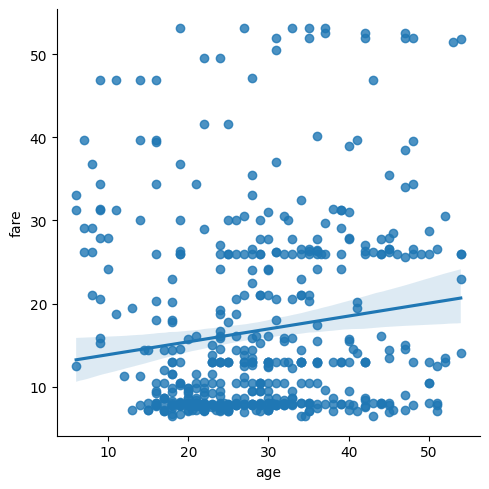

In [29]:
# plot
sns.lmplot(data=df_linear , x='age', y='fare')

<AxesSubplot:ylabel='age'>

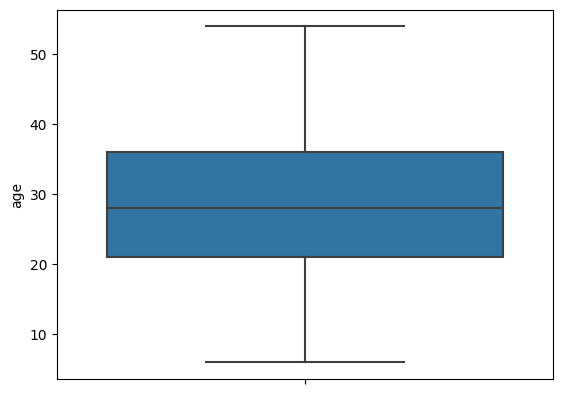

In [22]:
sns.boxplot(data=df_linear, y = 'age')

In [20]:
df_linear = df_linear[(df_linear['age'] > 5)& (df['age'] < 63)]

C:\Users\silen\AppData\Local\Temp\ipykernel_12344\3164198131.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_linear = df_linear[(df_linear['age'] > 5)& (df['age'] < 63)]


<AxesSubplot:ylabel='fare'>

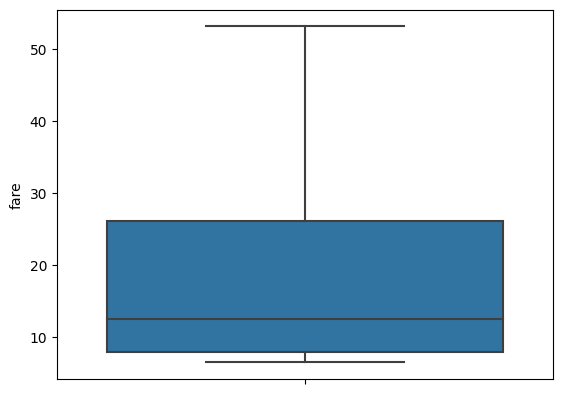

In [27]:
sns.boxplot(data=df_linear, y = 'fare')

In [26]:
df_linear = df_linear[(df_linear['fare'] > 5)& (df['fare'] < 55)]

C:\Users\silen\AppData\Local\Temp\ipykernel_12344\656293576.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_linear = df_linear[(df_linear['fare'] > 5)& (df['fare'] < 55)]


In [28]:
X = df_linear[['age']]
y= df_linear['fare']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

#Model
model = LinearRegression()

# train the model   
model.fit(X, y) 

# take prediction 
model.predict([[20]])

c:\Users\silen\.conda\envs\My_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.40319915])

In [32]:
# model evaluation with matrics
# r2 score
# mean squared error 
# mean absolute error
# root mean squared error

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

# model 
model = LinearRegression()

# train  
model.fit(X_train, y_train)
# prediction
y_pred = model.predict(X_test)

<AxesSubplot:xlabel='fare'>

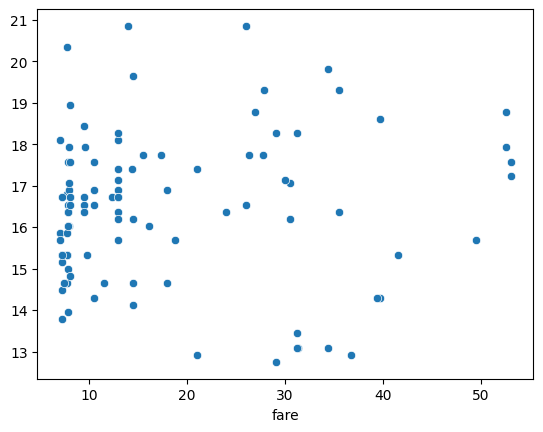

In [33]:
# compare
sns.scatterplot(x = y_test, y = y_pred)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
MAE = mean_absolute_error(y_pred, y_test)
MSE = mean_squared_error(y_pred, y_test)
R2 = r2_score(y_pred, y_test)
RMSE = mean_squared_error(y_pred, y_test, squared = False)

print("MAE:" ,MAE )
print("MSE:" ,MSE )
print("RMAE:" ,RMSE )
print("R_squared:" , R2 )

MAE: 9.954318206084869
MSE: 159.575560437777
RMAE: 12.632322052488094
R_squared: -51.48814033214059


In [38]:
import numpy as np 
RMSE = np.sqrt(MSE)
RMSE

12.632322052488094

# Assinment
MAE (Mean Absolute Error): Lower is better. Aim for close to 0.

MSE (Mean Squared Error): Lower is better. Aim for close to 0.

RMSE (Root Mean Squared Error): Lower is better. Aim for close to 0.

𝑅2
 Score: Higher is better. Aim for close to 100%.m